In [1]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Pacotes para análise de dados

import pandas as pd
import pandas_datareader.data as web
import numpy as np

#Análises de gráficos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Função para data
from datetime import datetime

#Informações de finanças

import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')


In [3]:
dados = web.get_data_yahoo('PETR4.SA', period='1y') #traz todos os dados de ação da Petrobrás de um ano

dados.shape #traz 252 linhas e 6 colunas

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [4]:
dados.head() #verifica os primeiros registros da empresa

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,31.900000,31.950001,31.260000,31.830000,18.601572,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,18.671703,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729471,88013400
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285326,55687000


In [5]:
dados.tail() #verifica os últimos registros

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,25.510000,25.809999,24.420000,24.520000,24.520000,83823000
2023-02-03,24.540001,25.379999,24.420000,24.790001,24.790001,71170700
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100


In [6]:
dados.describe() #estatística descritiva

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.982262,30.522341,29.439365,29.996111,23.333846,8.200633e+07
std,3.650480,3.668572,3.612010,3.638080,3.547291,3.676417e+07
min,21.000000,22.110001,20.770000,21.469999,17.537958,2.876520e+07
25%,27.082500,27.592500,26.332500,26.990000,20.002682,5.629405e+07
50%,30.820000,31.389999,30.300000,30.655000,23.106971,7.285520e+07
75%,32.717501,33.507500,32.382501,32.967500,26.054999,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [7]:
dados.info() #informações

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-08 to 2023-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [8]:
#Média móvel ajuda a entender algumas tendências.
#Conseguimos identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa.
#MMA = soma dos preços de fechamento / número de dias

#Média simples

lista = [11, 12, 13, 14, 15, 16, 17]

from statistics import mean as media
print(f'Média: {media(lista)}')

Média: 14


In [9]:
#Período da média móvel

n = 5

for intervalo in range(3):
  print(f'Dia {intervalo}: {sum(lista[intervalo:n]) / 5}')

Dia 0: 13.0
Dia 1: 10.8
Dia 2: 8.4


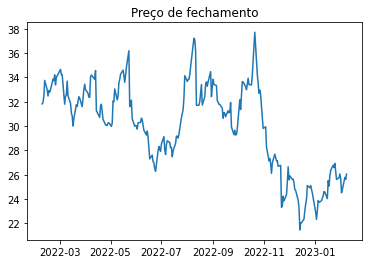

In [10]:
#Plot

plt.plot(dados['Close']) #preço de fechamento das ações da Petrobrás
plt.title('Preço de fechamento');

In [11]:
#Função rolling
from pandas.core import window

periodo = 5
dados['Close'].rolling(window = periodo).mean()

Date
2022-02-08       NaN
2022-02-09       NaN
2022-02-10       NaN
2022-02-11       NaN
2022-02-14    32.596
               ...  
2023-02-02    25.534
2023-02-03    25.368
2023-02-06    25.374
2023-02-07    25.284
2023-02-08    25.352
Name: Close, Length: 252, dtype: float64

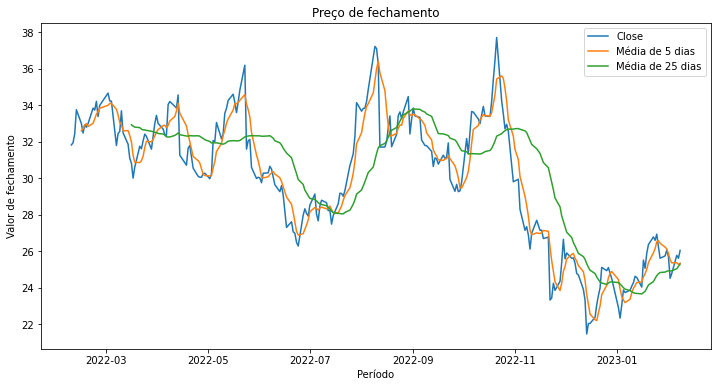

In [12]:
plt.figure(figsize = (12,6))
plt.plot(dados['Close']) 
plt.plot(dados['Close'].rolling(window = periodo).mean())
plt.plot(dados['Close'].rolling(window = periodo + 20).mean())
plt.title('Preço de fechamento');
plt.legend(['Close', 'Média de 5 dias', 'Média de 25 dias'])
plt.ylabel('Valor de fechamento')
plt.xlabel('Período');

In [13]:
#Plotly 
#Permite que o usuário consiga mexer mais nos elementos

In [14]:
periodo = 5
dados['Média_Movel'] = dados['Close'].rolling(window = periodo).mean()

dados.head()

#Mais rápido e simples
figura = px.line(
    dados,
    y = 'Close',
    title = 'Fechamento'
)

figura.show()

In [15]:
#Conseguimos customizar bastante

figura_02 = go.Figure(
    data = go.Scatter(
        x = dados.index,
        y = dados['Close'],
        line = (dict(color = 'firebrick', width = 3))
    )
)

figura_02.update_layout(
    title='Análise de fechamento',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento'
)

figura_02.show()

In [16]:
#Gráfico de cotação

grafico_candlestick = go.Figure(
    data = [
        go.Candlestick(
            x = dados.index,
            open = dados['Open'],
            high = dados['High'],
            low = dados['Low'],
            close = dados['Close'],
            increasing_line_color = 'cyan',
            decreasing_line_color = 'gray'
        )
    ]
)

grafico_candlestick.update_layout(
    xaxis_rangeslider_visible = False,
    title = 'Análise de fechamento',
    xaxis_title = 'Período',
    yaxis_title = 'Preço de fechamento'
)
grafico_candlestick.show()

# Criando relatório

In [17]:
figurafinal = make_subplots(
    rows = 2,
    cols = 1,
    specs = [
        [{'type': 'scatter'}],
        [{'type': 'scatter'}]
    ],
    vertical_spacing = 0.075,
    shared_xaxes = True,
    subplot_titles = ('Cotação', 'Fechamento')
)

#Layout e dimensão
figurafinal.update_layout(
    width = 1000,
    height = 800, #400 para formato mobile
    title_text = '<b>Advanced Analytics</b> <br> Follow-up Petrobrás'
)

#Adicionando gráfico na primeira posição
figurafinal.add_trace(
          go.Candlestick(
          x = dados.index,
          open = dados['Open'],
          high = dados['High'],
          low = dados['Low'],
          close = dados['Close'],
          increasing_line_color = 'cyan',
          decreasing_line_color = 'gray'
      ),
      row = 1, col = 1
)

figurafinal.update_layout(
    xaxis_rangeslider_visible = False
)

#Adicionando um gráfico na segunda posição

figurafinal.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Close'],
        mode = 'lines',
        name = 'Fechamento',
        line = dict(color = 'green')
    ),
    row = 2, col = 1
)

figurafinal.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Média_Movel'],
        mode = 'lines',
        name = 'Média Movel',
        line = dict(color = 'red')
    ),
    row = 2, col = 1
)

figurafinal.update_layout(
  legend = dict(
      orientation = 'h',
      yanchor = 'bottom',
      y = 1.02,
      xanchor = 'right',
      x = 1,
      font = dict(size = 10)
  )    
)

figurafinal.add_annotation(
    showarrow = False,
    text = 'Análise feita no evento de Python',
    font = dict(size = 14),
    xref = 'x domain',
    x = 1,
    yref = 'y domain',
    y = -1.4
)

figurafinal.add_annotation(
    showarrow = False,
    text = 'Feito por Cinthia Yumi',
    font = dict(size = 14),
    xref = 'x domain',
    x = 0,
    yref = 'y domain',
    y = -1.4
)

figurafinal.show()

In [18]:
#!pip install -U kaleido

In [19]:
figurafinal.write_image('Report_Financeiro.pdf')